In [1]:
!nvidia-smi

Sun Sep 10 13:08:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX550         WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P0              11W /  30W |      0MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

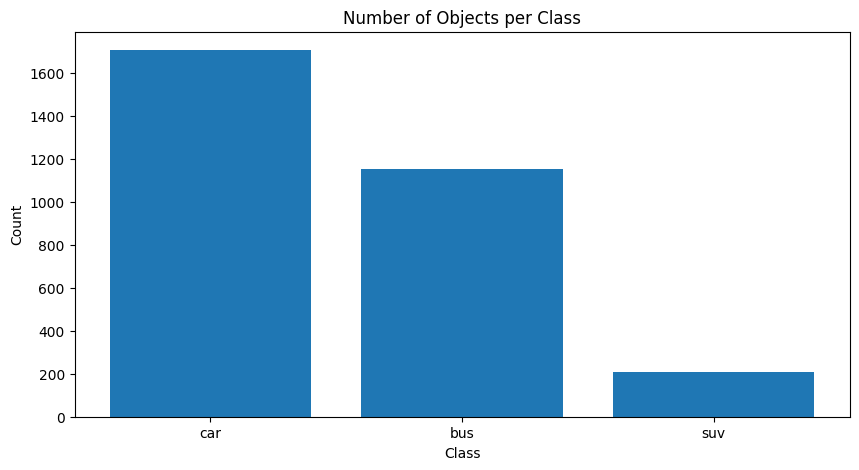

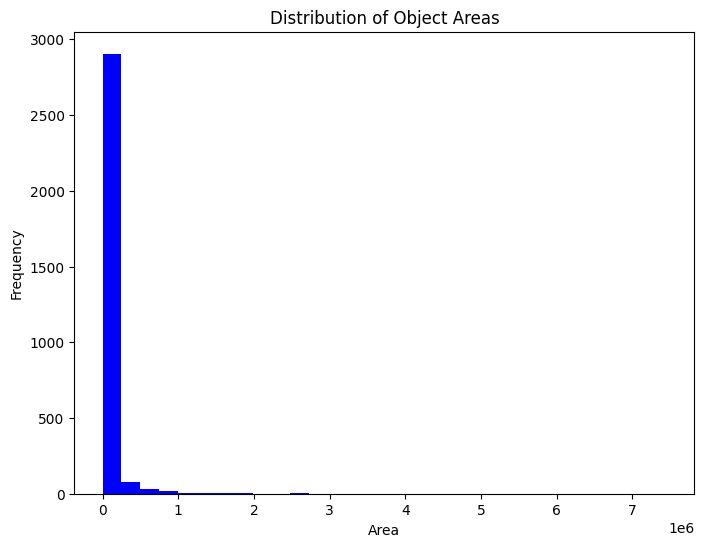

In [7]:
# Define your chosen classes
classes = ['car', 'bus', 'suv',]

# Initialize counts
class_counts = {cls: 0 for cls in classes}
area_data = []

# Iterate through the annotations
annotation_dir = 'D:\\Projects\\Dhvani\\Vehicle Detection\\train\\labels'
for xml_file in os.listdir(annotation_dir):
    try:
        tree = ET.parse(os.path.join(annotation_dir, xml_file))
        root = tree.getroot()
        for obj in root.findall('object'):
            obj_class = obj.find('name').text
            if obj_class in classes:
                class_counts[obj_class] += 1
                bbox = obj.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)
                area = (xmax - xmin) * (ymax - ymin)
                area_data.append(area)
    except ET.ParseError as e:
        print(f"Error parsing {xml_file}: {e}")

# Visualization 1: Number of objects per class
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Number of Objects per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualization 2: Distribution of Object Areas
plt.figure(figsize=(8, 6))
plt.hist(area_data, bins=30, color='blue')
plt.title('Distribution of Object Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()